# galaxy_category_token (= 전체자료에서 카테고리 분류 적용된 자료)

# ===========================================================
# 출처
# github ID : Jimin980921
# https://github.com/Jimin980921/Text_mining/blob/master/Project/review_preprocessing.ipynb

# 전처리

In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_category=pd.read_csv('output_galaxyCategory(1).csv')
df_category=df_category.drop(['Unnamed: 0'], axis=1)
df_category

,type,category,review,star
0,갤럭시S21,만족도,자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 ...,5
1,갤럭시S21,만족도,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",5
2,갤럭시S21,만족도,믿고 쓰는 회사 제품입니다. 티비\n믿고 쓰는 회사 제품입니다.\n티비 광고 보고 ...,5
3,갤럭시S21,만족도,갤S8에서 유심만 옮겨서 꽂았어요50퍼정도 충전돼서 왔고 액정필름 붙어서 오고 포장...,5
4,갤럭시S21,만족도,정말 만족한면서 잘 사용하고 있습니다.\n기존 사용하던 LG폰이 너무 버벅 거리고 ...,5
...,...,...,...,...
3288,갤럭시S21,배터리,최고예요\n아빠 선물로 사드렸어요! 그 전에 쓰던 폰보다 배터리도 오래가고 사진도 ...,5
3289,갤럭시S21,배터리,디자이너 더무이뻐요 배터리 오래간다 ㅋ\n디자이너 더무이뻐요 배터리 오래간다 ㅋ,5
3290,갤럭시S21,와이파이,최고예요\n배송은 빨랐어요. 주말에 주문했고 그 다음 수요일에 도착했어요. 폰 들어...,5
3291,갤럭시S21,와이파이,최고예요\n일단 배송이 빨라서 좋았구요.발열은 아직까진 없었습니다.속도도 좋고 아직...,5


In [4]:
text=''
review=[]
for each_line in df_category['review']:
    review.append(each_line)

In [5]:
#불용어 제거
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text   

review_=[]
for i in review:  #문자가 들어있을때는 인덱스 사용하면 안됨!!!!
    a=clean_str(i)
    review_.append(a)  #불용어제거한 review 저장

In [6]:
import nltk
from konlpy.tag import Okt; t=Okt()  #오픈 소스 한국어 분석기

#리뷰하나씩 형태소 추출
a= len(review_) #불용어 제거한 리뷰
token_review_list=[]
for i in range(0,a): # 리뷰하나당 처리하기위해 for문 
    token_review=t.morphs(review_[i])  #t=형태소분석기. morphs=형태소 추출.review_=전처리한 리뷰.
    #token_review_str=(' '.join(token_review))  #,로 나누어져있는 형태소를 하나의 str로 묶기(df에 넣기위해서)
    #df['token_reivew'] = token_review_str  #이렇게하면 열전체값이 통일됨
    token_review_list.append(token_review) #하나의 리스트를 만들어서 df에 추가해야함.
df_category['token_review']=token_review_list #형태소단위로 나누어진 리뷰저장

In [7]:
df_category

,type,category,review,star,token_review
0,갤럭시S21,만족도,자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 ...,5,"[자급, 제, 처음, 사보는데, 그, 전, 에는, 대리점, 가서, 맨날, 호갱, 당..."
1,갤럭시S21,만족도,"아이폰 7+를 쓰다 배터리가 빨리 닳기 시작한 점, 발열, 충전기 문제 등으로 핸드...",5,"[아이폰, 7, 를, 쓰다, 배터리, 가, 빨리, 닳기, 시작, 한, 점, 발열, ..."
2,갤럭시S21,만족도,믿고 쓰는 회사 제품입니다. 티비\n믿고 쓰는 회사 제품입니다.\n티비 광고 보고 ...,5,"[믿고, 쓰는, 회사, 제품, 입니다, 티비, \n, 믿고, 쓰는, 회사, 제품, ..."
3,갤럭시S21,만족도,갤S8에서 유심만 옮겨서 꽂았어요50퍼정도 충전돼서 왔고 액정필름 붙어서 오고 포장...,5,"[갤, S, 8, 에서, 유심, 만, 옮겨서, 꽂았어요, 50, 퍼정, 도, 충전,..."
4,갤럭시S21,만족도,정말 만족한면서 잘 사용하고 있습니다.\n기존 사용하던 LG폰이 너무 버벅 거리고 ...,5,"[정말, 만족한면서, 잘, 사용, 하고, 있습니다, \n, 기존, 사용, 하던, L..."
...,...,...,...,...,...
3288,갤럭시S21,배터리,최고예요\n아빠 선물로 사드렸어요! 그 전에 쓰던 폰보다 배터리도 오래가고 사진도 ...,5,"[최고, 예요, \n, 아빠, 선물, 로, 사, 드렸어요, 그, 전, 에, 쓰던, ..."
3289,갤럭시S21,배터리,디자이너 더무이뻐요 배터리 오래간다 ㅋ\n디자이너 더무이뻐요 배터리 오래간다 ㅋ,5,"[디자이너, 더무, 이뻐요, 배터리, 오래, 간다, 디자이너, 더무, 이뻐요, 배터..."
3290,갤럭시S21,와이파이,최고예요\n배송은 빨랐어요. 주말에 주문했고 그 다음 수요일에 도착했어요. 폰 들어...,5,"[최고, 예요, \n, 배송, 은, 빨랐어요, 주말, 에, 주문, 했고, 그, 다음..."
3291,갤럭시S21,와이파이,최고예요\n일단 배송이 빨라서 좋았구요.발열은 아직까진 없었습니다.속도도 좋고 아직...,5,"[최고, 예요, \n, 일단, 배송, 이, 빨, 라서, 좋았구요, 발열, 은, 아직..."


In [8]:
df_category.to_csv('galaxy_Total_token.csv', encoding='utf-8-sig', mode='w')

# EDA

In [9]:
#별점 기준으로 정렬
df_sorted_by_star2= df_category.sort_values(by='star' ,ascending=False)

In [10]:
df_sorted_by_star2

,type,category,review,star,token_review
0,갤럭시S21,만족도,자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 ...,5,"[자급, 제, 처음, 사보는데, 그, 전, 에는, 대리점, 가서, 맨날, 호갱, 당..."
2177,갤럭시S21,가격,최고예요\ns21쓰던 폰이 갑자기 안켜져서 급하게 샀는데배송 하루만에 왔구 엄청 빨...,5,"[최고, 예요, \n, s, 21, 쓰던, 폰, 이, 갑자기, 안, 켜져서, 급하게..."
2100,갤럭시S21,가격,할인해서 싸게 잘산거 같아요\n할인해서 싸게 잘산거 같아요,5,"[할인, 해서, 싸게, 잘산거, 같아요, \n, 할인, 해서, 싸게, 잘산거, 같아요]"
2101,갤럭시S21,가격,아주 좋습니다 싸게 잘샀어요\n아주 좋습니다 싸게 잘샀어요,5,"[아주, 좋습니다, 싸게, 잘, 샀어요, \n, 아주, 좋습니다, 싸게, 잘, 샀어요]"
2102,갤럭시S21,가격,싼가격에 잘 샀어오~\n싼가격에 잘 샀어오~,5,"[싼, 가격, 에, 잘, 샀어오, \n, 싼, 가격, 에, 잘, 샀어오]"
...,...,...,...,...,...
1130,갤럭시S21,만족도,최악이에요\n판매자측 태도도 최악이구요다시는여기서 물건안삽니다분명10일오후5시57분...,1,"[최악, 이에요, \n, 판매, 자, 측, 태도, 도, 최악, 이구, 요, 다시는,..."
156,갤럭시S21,만족도,1번 : 예전 번호 기재 2번 : 예\n1번 : 예전 번호 기재\n2번 : 예전 번...,1,"[1, 번, 예전, 번호, 기재, 2, 번, 예, \n, 1, 번, 예전, 번호, ..."
756,갤럭시S21,만족도,구매시 그레이색이라고 되어있고 색상선택 메뉴도 없었는데...\n구매시 그레이색이라고...,1,"[구매, 시, 그레이, 색, 이라고, 되어있고, 색상, 선택, 메뉴, 도, 없었는데..."
1190,갤럭시S21,만족도,최악이에요\n음 그냥 판매처의 대처가 좀 별로임 제품은 새거인 이상 문제가 있진 않아요,1,"[최악, 이에요, \n, 음, 그냥, 판매, 처, 의, 대처, 가, 좀, 별로, 임..."


In [11]:
adf=df_sorted_by_star2.groupby('star').count()
adf 

,type,category,review,token_review
star,,,,
1,5,5,5,5
2,3,3,3,3
3,48,48,48,48
4,309,309,309,309
5,2928,2928,2928,2928


In [12]:
five_review=[]
five_token_review=[]
for i in range(0,2928):
    if(df_category['star'][i]==5):
        five_review.append(df_category['review'][i])  #5점리뷰모음. len=3191
        five_token_review.append(df_category['token_review'][i]) 

In [13]:
len(five_token_review)

2631

In [14]:
# 단어 빈도수 계산
frequency = {}

for token_review in five_token_review:
    for word in token_review:
        count = frequency.get(word,0)
        frequency[word] = count + 1
sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)

sort

[('\n', 3152),
 ('도', 2418),
 ('이', 1981),
 ('에', 1786),
 ('최고', 1742),
 ('예요', 1694),
 ('배송', 1556),
 ('잘', 1258),
 ('폰', 1095),
 ('구매', 949),
 ('너무', 900),
 ('으로', 769),
 ('가', 753),
 ('은', 708),
 ('로', 707),
 ('사용', 651),
 ('자급', 612),
 ('좋아요', 596),
 ('제', 578),
 ('을', 567),
 ('빠르고', 558),
 ('요', 479),
 ('사은', 461),
 ('가격', 456),
 ('만족합니다', 418),
 ('했는데', 407),
 ('색상', 403),
 ('것', 394),
 ('21', 387),
 ('선물', 351),
 ('다', 350),
 ('해서', 348),
 ('핸드폰', 347),
 ('좋네요', 339),
 ('보다', 331),
 ('같아요', 326),
 ('바이올렛', 318),
 ('저렴하게', 310),
 ('는', 309),
 ('제품', 307),
 ('했어요', 302),
 ('좋은', 302),
 ('하고', 297),
 ('s', 293),
 ('할인', 283),
 ('만', 283),
 ('갤럭시', 280),
 ('주문', 280),
 ('마음', 280),
 ('한', 277),
 ('바로', 277),
 ('발열', 275),
 ('이라', 275),
 ('구입', 269),
 ('에서', 264),
 ('맘', 262),
 ('더', 252),
 ('를', 251),
 ('카메라', 251),
 ('좋습니다', 250),
 ('케이스', 247),
 ('아주', 245),
 ('넘', 242),
 ('했습니다', 241),
 ('고민', 240),
 ('필름', 237),
 ('포장', 235),
 ('많이', 231),
 ('충전기', 227),
 ('디자인', 225),
 ('품도', 2

# ===========================================================

# 상기 과정 까지는 인용한 코드

# ===========================================================

# 자체 EDA 및 분석

### 기본 분석

In [15]:
df = df_sorted_by_star2  
df  #별점 기준 정렬한 데이터 

,type,category,review,star,token_review
0,갤럭시S21,만족도,자급제 처음 사보는데 그전에는 대리점 가서 맨날 호갱당하구 높은요금제 .서서 나름 ...,5,"[자급, 제, 처음, 사보는데, 그, 전, 에는, 대리점, 가서, 맨날, 호갱, 당..."
2177,갤럭시S21,가격,최고예요\ns21쓰던 폰이 갑자기 안켜져서 급하게 샀는데배송 하루만에 왔구 엄청 빨...,5,"[최고, 예요, \n, s, 21, 쓰던, 폰, 이, 갑자기, 안, 켜져서, 급하게..."
2100,갤럭시S21,가격,할인해서 싸게 잘산거 같아요\n할인해서 싸게 잘산거 같아요,5,"[할인, 해서, 싸게, 잘산거, 같아요, \n, 할인, 해서, 싸게, 잘산거, 같아요]"
2101,갤럭시S21,가격,아주 좋습니다 싸게 잘샀어요\n아주 좋습니다 싸게 잘샀어요,5,"[아주, 좋습니다, 싸게, 잘, 샀어요, \n, 아주, 좋습니다, 싸게, 잘, 샀어요]"
2102,갤럭시S21,가격,싼가격에 잘 샀어오~\n싼가격에 잘 샀어오~,5,"[싼, 가격, 에, 잘, 샀어오, \n, 싼, 가격, 에, 잘, 샀어오]"
...,...,...,...,...,...
1130,갤럭시S21,만족도,최악이에요\n판매자측 태도도 최악이구요다시는여기서 물건안삽니다분명10일오후5시57분...,1,"[최악, 이에요, \n, 판매, 자, 측, 태도, 도, 최악, 이구, 요, 다시는,..."
156,갤럭시S21,만족도,1번 : 예전 번호 기재 2번 : 예\n1번 : 예전 번호 기재\n2번 : 예전 번...,1,"[1, 번, 예전, 번호, 기재, 2, 번, 예, \n, 1, 번, 예전, 번호, ..."
756,갤럭시S21,만족도,구매시 그레이색이라고 되어있고 색상선택 메뉴도 없었는데...\n구매시 그레이색이라고...,1,"[구매, 시, 그레이, 색, 이라고, 되어있고, 색상, 선택, 메뉴, 도, 없었는데..."
1190,갤럭시S21,만족도,최악이에요\n음 그냥 판매처의 대처가 좀 별로임 제품은 새거인 이상 문제가 있진 않아요,1,"[최악, 이에요, \n, 음, 그냥, 판매, 처, 의, 대처, 가, 좀, 별로, 임..."


In [16]:
df_sorted_by_star2.info()    #  데이터프레임 분석1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3293 entries, 0 to 316
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          3293 non-null   object
 1   category      3293 non-null   object
 2   review        3293 non-null   object
 3   star          3293 non-null   int64 
 4   token_review  3293 non-null   object
dtypes: int64(1), object(4)
memory usage: 154.4+ KB


In [17]:
df_sorted_by_star2.describe()   #  데이터프레임 분석2

,star
count,3293.000000
mean,4.868205
std,0.409042
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


### 자체 EDA 및 분석1

In [18]:
## 별점에 따라 데이터프레임 분리 ##
df1 = df[df['star']==1]
df2 = df[df['star']==2]
df3 = df[df['star']==3]
df4 = df[df['star']==4]
df5 = df[df['star']==5]

In [21]:
## 카테고리에 따라 데이터프레임 분리 ##

# 카테고리 종류 확인
unique_name = df['category'].value_counts().keys()
print(df['category'].value_counts())
print(unique_name)
print(['satisfaction','price','color','design','size','quality','usability',\
       'product_composition','weight','product_condition','battery','wifi'])

# 카테고리 분류용 class 생성
class cat :
    def __init__(self,n):
        self.n = n
        
    def make_df(self):
        res = df [df['category']==unique_name[self.n]]
        return res
    
# class instance 지정
cat1=cat(0)
cat2=cat(1)
cat3=cat(2)
cat4=cat(3)
cat5=cat(4)
cat6=cat(5)
cat7=cat(6)
cat8=cat(7)
cat9=cat(8)
cat10=cat(9)
cat11=cat(10)
cat12=cat(11)

# 카테고리별 데이터프레임 분리 및 변수 지정
df_satisfaction=cat1.make_df()
df_price=cat2.make_df()
df_color=cat3.make_df()
df_design=cat4.make_df()
df_size=cat5.make_df()
df_quality=cat6.make_df()
df_usability=cat7.make_df()
df_product_composition=cat8.make_df()
df_weight=cat9.make_df()
df_product_condition=cat10.make_df()
df_battery=cat11.make_df()
df_wifi=cat12.make_df()

만족도     1953
가격       431
색상       368
디자인      184
사이즈      103
품질        64
사용성       64
제품구성      54
무게        46
제품상태      19
배터리        4
와이파이       3
Name: category, dtype: int64
Index(['만족도', '가격', '색상', '디자인', '사이즈', '품질', '사용성', '제품구성', '무게', '제품상태',
       '배터리', '와이파이'],
      dtype='object')
['satisfaction', 'price', 'color', 'design', 'size', 'quality', 'usability', 'product_composition', 'weight', 'product_condition', 'battery', 'wifi']


[4.876600102406554, 4.91415313225058, 4.8396739130434785, 4.918478260869565, 4.757281553398058, 4.5625, 4.84375, 4.796296296296297, 4.913043478260869, 4.7894736842105265, 5.0, 5.0]
['satisfaction', 'price', 'color', 'design', 'size', 'quality', 'usability', 'product_composition', 'weight', 'product_condition', 'battery', 'wifi']


Text(0, 0.5, 'review_counts')

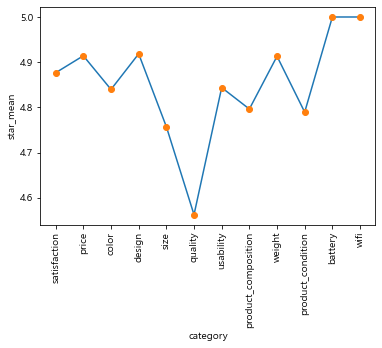

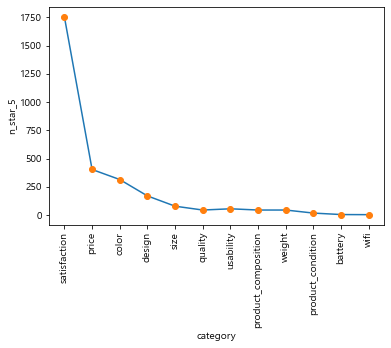

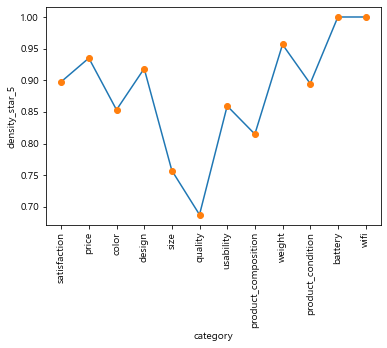

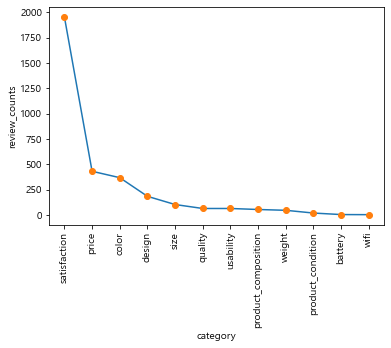

In [144]:
# 각 카테고리별 별점 평균 구하기
mean_list=[]
mean_list.append(df_satisfaction['star'].mean())
mean_list.append(df_price['star'].mean())
mean_list.append(df_color['star'].mean())
mean_list.append(df_design['star'].mean())
mean_list.append(df_size['star'].mean())
mean_list.append(df_quality['star'].mean())
mean_list.append(df_usability['star'].mean())
mean_list.append(df_product_composition['star'].mean())
mean_list.append(df_weight['star'].mean())
mean_list.append(df_product_condition['star'].mean())
mean_list.append(df_battery['star'].mean())
mean_list.append(df_wifi['star'].mean())

# 각 카테고리별 별점 5점 개수 구하기
n_star5=[]
n_star5.append(len(df_satisfaction[df_satisfaction['star']==5]))
n_star5.append(len(df_price[df_price['star']==5]))
n_star5.append(len(df_color[df_color['star']==5]))
n_star5.append(len(df_design[df_design['star']==5]))
n_star5.append(len(df_size[df_size['star']==5]))
n_star5.append(len(df_quality[df_quality['star']==5]))
n_star5.append(len(df_usability[df_usability['star']==5]))
n_star5.append(len(df_product_composition[df_product_composition['star']==5]))
n_star5.append(len(df_weight[df_weight['star']==5]))
n_star5.append(len(df_product_condition[df_product_condition['star']==5]))
n_star5.append(len(df_battery[df_battery['star']==5]))
n_star5.append(len(df_wifi[df_wifi['star']==5]))


# 각 카테고리 이름 영어로 변환
x=['satisfaction','price','color','design','size','quality','usability','product_composition','weight','product_condition','battery','wifi']
    
print(mean_list)
print(x)
#########################################################################################################################################
## EDA  ##

# 각 카테고리별 별점 평균
plt.plot(x,mean_list)
plt.plot(x,mean_list,'o')
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("star_mean")

# 각 카테고리별 5점 수
plt.figure()
plt.plot(x,n_star5)
plt.plot(x,n_star5,'o')
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("n_star_5")

# 각 카테고리별 5점 비율 
plt.figure()
plt.plot(x,n_star5/df['category'].value_counts())
plt.plot(x,n_star5/df['category'].value_counts(),'o')
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("density_star_5")

# 각 카테고리별 리뷰 수
plt.figure()
plt.plot(x,df['category'].value_counts())
plt.plot(x,df['category'].value_counts(),'o')
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("review_counts")



### 자체 EDA 및 분석2

[-31.15936537 259.08739334]


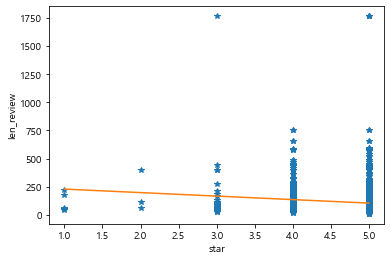

In [141]:
## 별점과 리뷰 길이 (글자수) 의 상관관계 분석 ##

# ggplot2의 jitter나 boxplot 을 배웠다면 좋았을 것으로 생각되지만
# 해당 결과를 보면 대체적으로 별점이 높을수록 리뷰 길이가 짧아지는 경향을 보이는 것을 확인할 수 있다.
# 하지만 해당 자료는 이상치가 존재하기 때문에 선형관계가 정확하지 않을 수 있다.
# 실제로 직관적인 분포를 봤을 때는 별점이 높을수록 리뷰 길이가 길어지는 경향으로 분포한 것처럼 확인된다.


nchar=[]
for i in range(len(df)):
    nchar.append(len(df['review'][i]))
    
df['nchar']=nchar    

plt.plot(df['star'],df['nchar'],'*')
plt.xlabel('star')
plt.ylabel('len_review')

coef=np.polyfit(df['star'],df['nchar'],1)
xx=np.linspace(1,5,100)
yy= np.polyval(coef,xx)

plt.plot(xx,yy)
print(coef)

### 자체 EDA 및 분석3

Text(0, 0.5, 'star_mean')

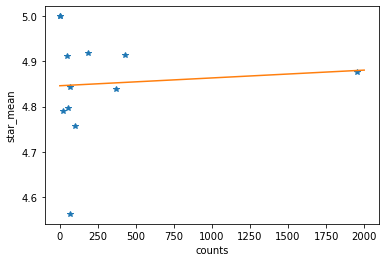

In [94]:
## 각 카테고리별 리뷰 수에 따른 별점 평균 상관관계 분석 ##
# 강한 선형관계나 상관관계 가지지 않는 것으로 파악되지만, 만족도 카테고리의 리뷰가 압도적으로 많아 정확한 분석 어려움
plt.figure()
plt.plot(df['category'].value_counts(),mean_list,'*')

coef=np.polyfit(df['category'].value_counts(),mean_list,1)
xx= np.linspace(0,2000,1000)
yy= np.polyval(coef,xx)
plt.plot(xx,yy)
plt.xlabel("counts")
plt.ylabel("star_mean")


### 자체 EDA 및 분석4

In [137]:
## 카테고리별 단어 개수(최대한 조사 제외하는 방향으로) 저장 ##

#####################################################################################
#상기 인용 코드 변형 (dictionary 수업내용으로 변형, 조건문 추가) ####################
#####################################################################################
def count_word(dff):
    
    df_token_review=[]
    for i in range(0,len(dff)):
        df_token_review.append(df['token_review'][i]) 
    
    frequency = {}
        
    for token_review in df_token_review:
        for word in token_review:
            if word not in ['\n','이','도','에','예요','은','는','가','을','를','로','에','요',\
                            '\n\n','으로','에서','에는','그','것','다','의','들','서','만','와','과','이라']:
                frequency[word] = frequency.get(word,0)+ 1
    sort=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
    
    return sort
#####################################################################################
#####################################################################################
#####################################################################################

sort_satisfaction =  count_word(df_satisfaction)
sort_price=  count_word(df_price)
sort_color=  count_word(df_color)
sort_design=  count_word(df_design)
sort_size=  count_word(df_size)
sort_quality=  count_word(df_quality)
sort_usability=  count_word(df_usability)
sort_product_composition=  count_word(df_product_composition)
sort_weight=  count_word(df_weight)
sort_product_condition=  count_word(df_product_condition)
sort_battery=  count_word(df_battery)
sort_wifi=  count_word(df_wifi)

In [138]:
## 카테고리별 상위 30개 단어 비교 ##

# 긍정적인 반응이 많음을 확인 가능(최고, 잘, 빠르고, 만족합니다 등등 = 실제로 5~4점 별점의 비율 높음)

# 자급제에 대한 내용이 많은 것으로 보아 자급제 스마트폰의 수요가 증가했음을 유추 가능.

# 특히 단점의 측면에서 발열에 대한 언급이 많은 것을 볼 수 있다. 
#('실제 발열이 존재하는지 / 혹은 발열이 있다고 들었는데 없었는지' 와 같은 내용은 확인 필요)

print(f'sort_satisfaction = {sort_satisfaction[0:30]}')
print(f'\nsort_price = {sort_price[0:30]}')
print(f'\nsort_color = {sort_color[0:30]}')
print(f'\nsort_design = {sort_design[0:30]}')
print(f'\nsort_size = {sort_size[0:30]}')
print(f'\nsort_quality = {sort_quality[0:30]}')
print(f'\nsort_usability = {sort_usability[0:30]}')
print(f'\nsort_product_composition = {sort_product_composition[0:30]}')
print(f'\nsort_weight = {sort_weight[0:30]}')
print(f'\nsort_product_condition = {sort_product_condition[0:30]}')
print(f'\nsort_battery = {sort_battery[0:30]}')
print(f'\nsort_wifi = {sort_wifi[0:30]}')

sort_satisfaction = [('최고', 1182), ('배송', 1130), ('폰', 824), ('잘', 773), ('너무', 637), ('구매', 604), ('좋아요', 542), ('사용', 491), ('빠르고', 423), ('제', 401), ('자급', 396), ('만족합니다', 364), ('사은', 324), ('했는데', 277), ('선물', 268), ('좋네요', 257), ('핸드폰', 248), ('21', 243), ('해서', 241), ('제품', 236), ('색상', 235), ('맘', 227), ('발열', 215), ('한', 209), ('가격', 203), ('같아요', 199), ('하고', 199), ('포장', 197), ('주문', 196), ('보다', 194)]

sort_price = [('폰', 505), ('구매', 335), ('잘', 326), ('사용', 317), ('배송', 252), ('최고', 249), ('제', 217), ('너무', 216), ('자급', 207), ('21', 165), ('발열', 161), ('사은', 161), ('했는데', 148), ('해서', 141), ('한', 141), ('핸드폰', 138), ('좋아요', 127), ('충전기', 126), ('하고', 124), ('s', 122), ('색상', 121), ('필름', 117), ('카메라', 116), ('갤럭시', 115), ('보다', 114), ('할', 113), ('같아요', 109), ('케이스', 107), ('바로', 104), ('S', 101)]

sort_color = [('폰', 484), ('구매', 312), ('사용', 295), ('잘', 284), ('최고', 220), ('제', 206), ('배송', 204), ('너무', 203), ('자급', 199), ('21', 155), ('발열', 155), ('했는데', 141), ('사은', 1

Text(0, 0.5, 'wifi_counts')

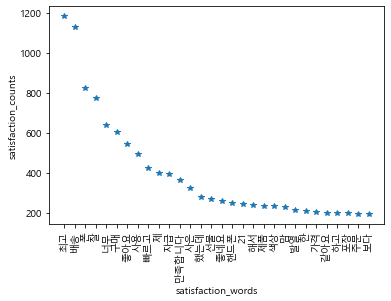

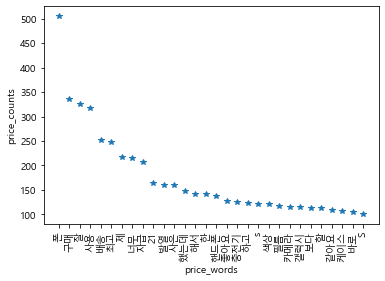

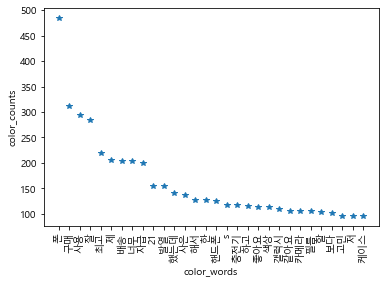

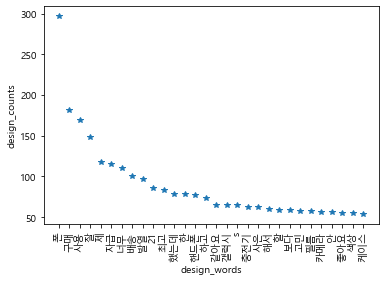

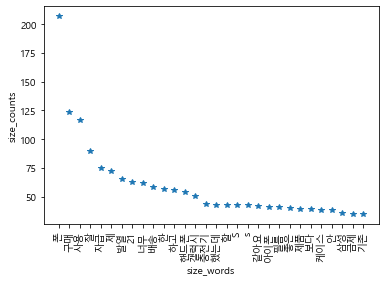

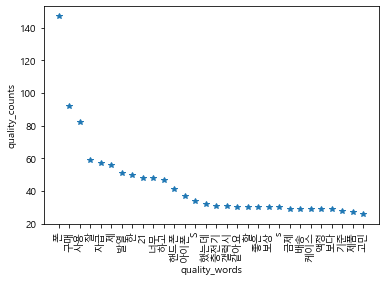

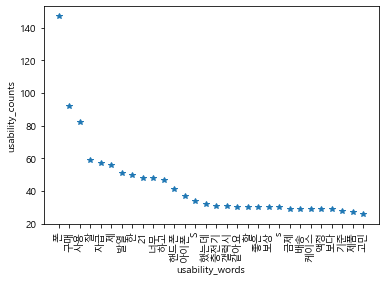

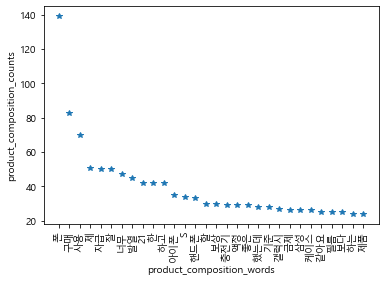

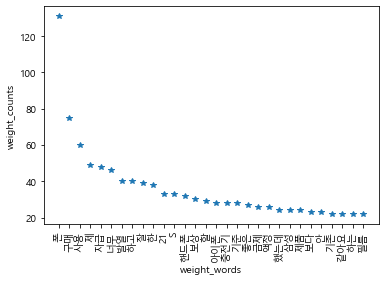

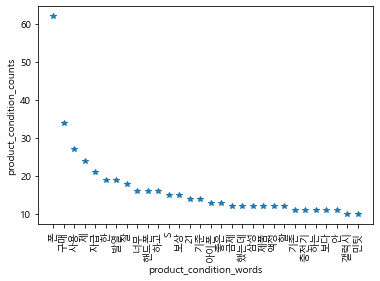

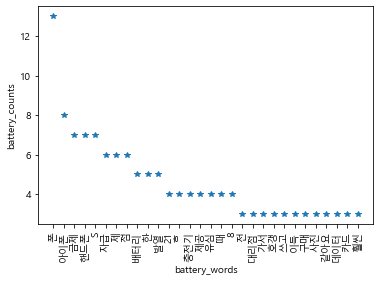

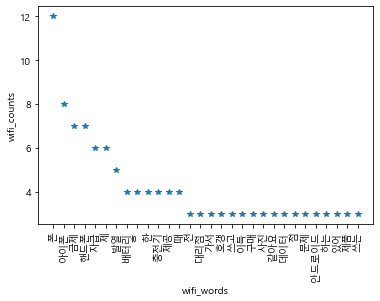

In [142]:
## 카테고리별 단어 빈도수 시각화 (상위 30개 단어 기준) ##

plt.rc('font', family='Malgun Gothic') #[출처] 파이썬강좌 - 맷플랍립 matplotlib.pyplot 그래프에서 ㅁㅁㅁ 한글 깨지는거 해결해주는 코드 plt.rc('font', family='Malgun Gothic')|작성자 프롭텡 프롭테크  (https://blog.naver.com/rock6212/222585719056) 

x=list(dict(sort_satisfaction).keys())[:30]
y=list(dict(sort_satisfaction).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('satisfaction_words')
plt.ylabel('satisfaction_counts')

plt.figure()
x=list(dict(sort_price).keys())[:30]
y=list(dict(sort_price).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('price_words')
plt.ylabel('price_counts')

plt.figure()
x=list(dict(sort_color).keys())[:30]
y=list(dict(sort_color).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('color_words')
plt.ylabel('color_counts')

plt.figure()
x=list(dict(sort_design).keys())[:30]
y=list(dict(sort_design).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('design_words')
plt.ylabel('design_counts')

plt.figure()
x=list(dict(sort_size).keys())[:30]
y=list(dict(sort_size).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('size_words')
plt.ylabel('size_counts')

plt.figure()
x=list(dict(sort_quality).keys())[:30]
y=list(dict(sort_quality).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('quality_words')
plt.ylabel('quality_counts')

plt.figure()
x=list(dict(sort_usability).keys())[:30]
y=list(dict(sort_usability).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('usability_words')
plt.ylabel('usability_counts')

plt.figure()
x=list(dict(sort_product_composition).keys())[:30]
y=list(dict(sort_product_composition).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('product_composition_words')
plt.ylabel('product_composition_counts')

plt.figure()
x=list(dict(sort_weight).keys())[:30]
y=list(dict(sort_weight).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('weight_words')
plt.ylabel('weight_counts')

plt.figure()
x=list(dict(sort_product_condition).keys())[:30]
y=list(dict(sort_product_condition).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('product_condition_words')
plt.ylabel('product_condition_counts')

plt.figure()
x=list(dict(sort_battery).keys())[:30]
y=list(dict(sort_battery).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('battery_words')
plt.ylabel('battery_counts')

plt.figure()
x=list(dict(sort_wifi).keys())[:30]
y=list(dict(sort_wifi).values())[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('wifi_words')
plt.ylabel('wifi_counts')

Text(0, 0.5, 'wifi_density')

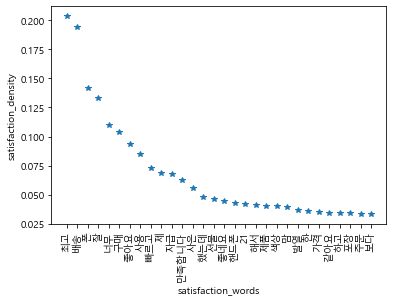

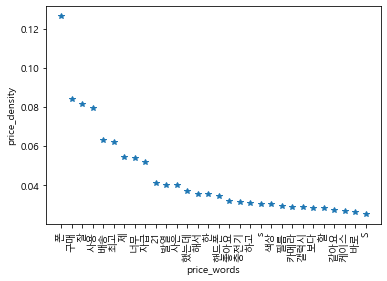

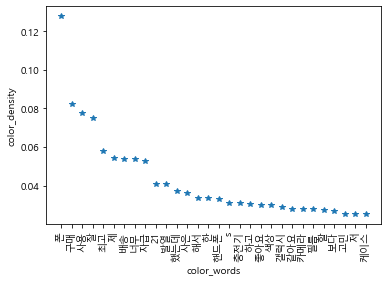

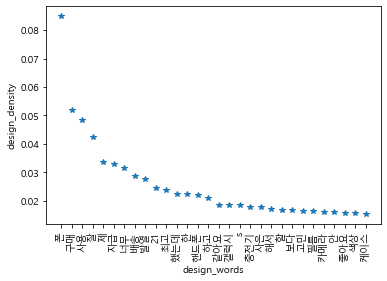

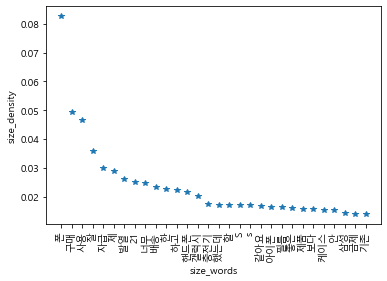

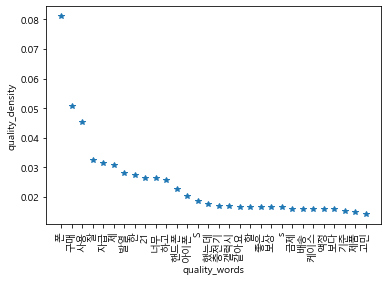

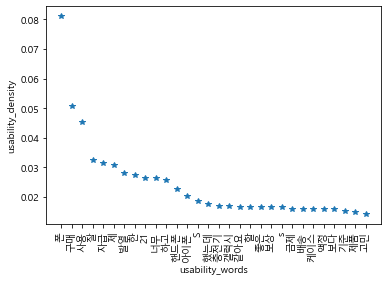

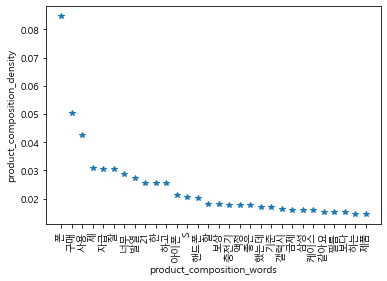

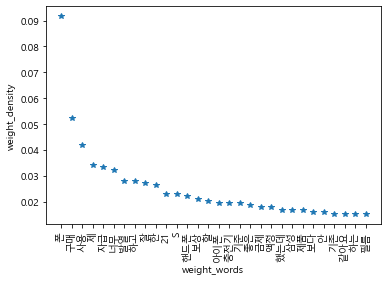

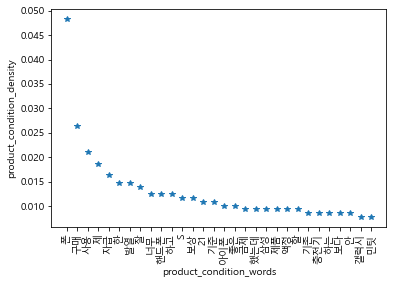

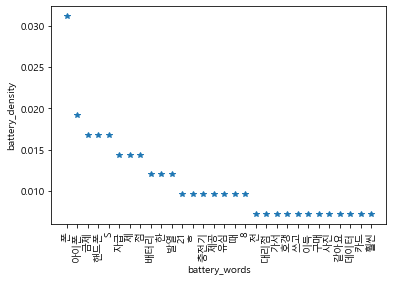

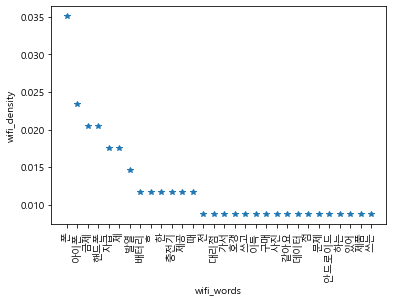

In [147]:
## 카테고리별 단어 비율 시각화 (상위 30개 단어 기준) ##

plt.rc('font', family='Malgun Gothic') #[출처] 파이썬강좌 - 맷플랍립 matplotlib.pyplot 그래프에서 ㅁㅁㅁ 한글 깨지는거 해결해주는 코드 plt.rc('font', family='Malgun Gothic')|작성자 프롭텡 프롭테크  (https://blog.naver.com/rock6212/222585719056) 

x=list(dict(sort_satisfaction).keys())[:30]
y=list(pd.Series(dict(sort_satisfaction))/len(dict(sort_satisfaction)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('satisfaction_words')
plt.ylabel('satisfaction_density')

plt.figure()
x=list(dict(sort_price).keys())[:30]
y=list(pd.Series(dict(sort_price))/len(dict(sort_price)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('price_words')
plt.ylabel('price_density')

plt.figure()
x=list(dict(sort_color).keys())[:30]
y=list(pd.Series(dict(sort_color))/len(dict(sort_color)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('color_words')
plt.ylabel('color_density')

plt.figure()
x=list(dict(sort_design).keys())[:30]
y=list(pd.Series(dict(sort_design))/len(dict(sort_design)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('design_words')
plt.ylabel('design_density')

plt.figure()
x=list(dict(sort_size).keys())[:30]
y=list(pd.Series(dict(sort_size))/len(dict(sort_size)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('size_words')
plt.ylabel('size_density')

plt.figure()
x=list(dict(sort_quality).keys())[:30]
y=list(pd.Series(dict(sort_quality))/len(dict(sort_quality)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('quality_words')
plt.ylabel('quality_density')

plt.figure()
x=list(dict(sort_usability).keys())[:30]
y=list(pd.Series(dict(sort_usability))/len(dict(sort_usability)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('usability_words')
plt.ylabel('usability_density')

plt.figure()
x=list(dict(sort_product_composition).keys())[:30]
y=list(pd.Series(dict(sort_product_composition))/len(dict(sort_product_composition)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('product_composition_words')
plt.ylabel('product_composition_density')

plt.figure()
x=list(dict(sort_weight).keys())[:30]
y=list(pd.Series(dict(sort_weight))/len(dict(sort_weight)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('weight_words')
plt.ylabel('weight_density')

plt.figure()
x=list(dict(sort_product_condition).keys())[:30]
y=list(pd.Series(dict(sort_product_condition))/len(dict(sort_product_condition)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('product_condition_words')
plt.ylabel('product_condition_density')

plt.figure()
x=list(dict(sort_battery).keys())[:30]
y=list(pd.Series(dict(sort_battery))/len(dict(sort_battery)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('battery_words')
plt.ylabel('battery_density')

plt.figure()
x=list(dict(sort_wifi).keys())[:30]
y=list(pd.Series(dict(sort_wifi))/len(dict(sort_wifi)))[:30]
plt.plot(x,y,'*')
plt.xticks(rotation=90)     #[출처] https://matplotlib.org/2.0.2/api/pyplot_api.html?highlight=xticks#matplotlib.pyplot.xticks
plt.xlabel('wifi_words')
plt.ylabel('wifi_density')